In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
plt.rc('font',**{'size':18})

from scipy import stats
import yaml

from param import patch_expr, patch_lat_lon, patch_cmap
from util import geoaxes

### scatter plot

In [2]:
def txt2lonlat(txt):
    lonlat = txt[28:] # remove the header
    lat, lon = lonlat.split('_')
    
    if lat[-2:] == '.0':
        lat = lat[:-2] # remove the trailing .0
    lon = lon[:-2]
        
    return f'({lon}, {lat})'

In [3]:
dT = 1.5

with open('data/DGPI_AM4.yaml', 'r') as f:
    dgpi = yaml.safe_load(f)
    
with open('data/SPI_AM4.yaml', 'r') as f:
    spi = yaml.safe_load(f)
    
with open('data/Cloud_feedback_AM4.yaml', 'r') as f:
    cf = yaml.safe_load(f)
    
with open('data/patch_expr_SPI_SW.yaml', 'r') as f:
    amx = yaml.safe_load(f)

In [4]:
exps = patch_expr()
ctl = exps[0]
perts = exps[1:]

basin = 'NH Tropics'
ddgpi = np.array([(dgpi[basin][pert] - dgpi[basin][ctl])/dgpi[basin][ctl]*100/dT for pert in perts])
dspi = np.array([(spi[basin][pert] - spi[basin][ctl])/spi[basin][ctl]*100/dT for pert in perts])
sw = np.array([cf[basin][pert]['lambda_c_sw'] for pert in perts])

color = patch_cmap()

<>:10: SyntaxWarning: invalid escape sequence '\d'
<>:10: SyntaxWarning: invalid escape sequence '\d'
<>:10: SyntaxWarning: invalid escape sequence '\d'
<>:10: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_832809/4070170024.py:10: SyntaxWarning: invalid escape sequence '\d'
  ['$\delta$DGPI/$\Delta T$ (%/K)', '$\delta$SPI/$\Delta T$ (%/K)'],
/tmp/ipykernel_832809/4070170024.py:10: SyntaxWarning: invalid escape sequence '\d'
  ['$\delta$DGPI/$\Delta T$ (%/K)', '$\delta$SPI/$\Delta T$ (%/K)'],


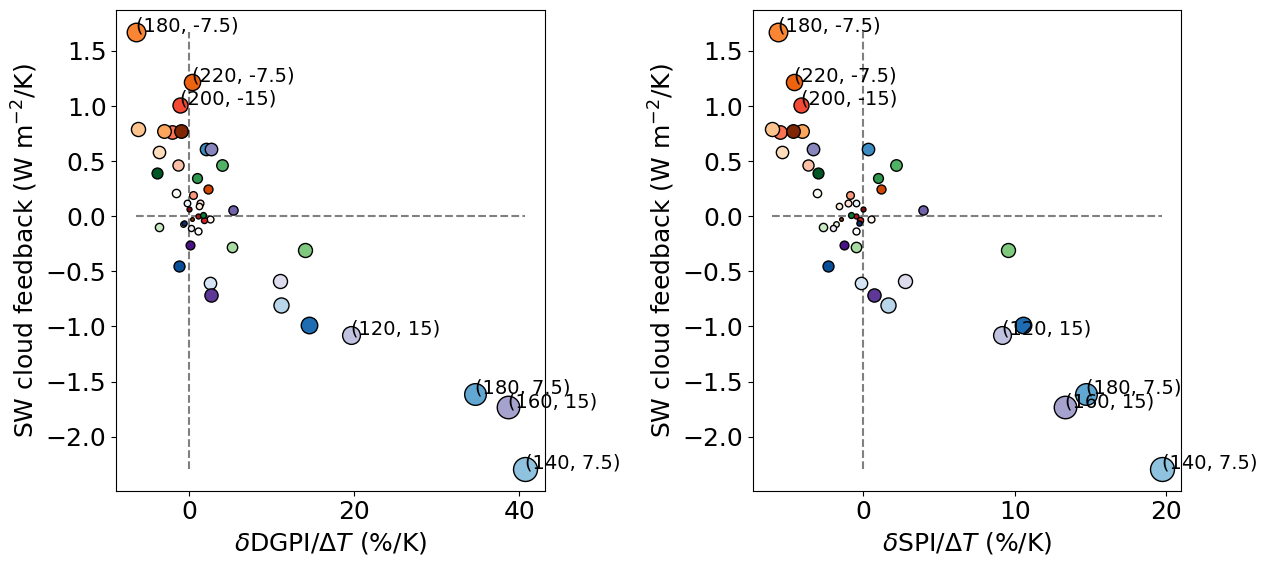

In [5]:
## get size array
sizes = []

fig, axes = plt.subplots(1, 2, figsize=(13, 6), facecolor='w')

for ax, xx, yy, xlabel, ylabel in \
    zip(axes, 
        [ddgpi, dspi], 
        [sw, sw], 
        ['$\delta$DGPI/$\Delta T$ (%/K)', '$\delta$SPI/$\Delta T$ (%/K)'], 
        ['SW cloud feedback (W m$^{-2}$/K)', 'SW cloud feedback (W m$^{-2}$/K)']):
    plt.sca(ax)
    
    plt.plot([np.min(xx), np.max(xx)], [0, 0], 'gray', ls='--')
    plt.plot([0, 0], [np.min(yy), np.max(yy)], 'gray', ls='--')

    for i in range(len(perts)):
        if len(sizes) < len(perts): # size array is determined by DGPI
            size = ((xx[i]/np.max(abs(xx)))**2 + (yy[i]/np.max(abs(yy)))**2)**0.2*15
            sizes.append(size)
        plt.plot(xx[i], yy[i], 'o', markersize=sizes[i], c=color[i], markeredgecolor='k')
        
        if yy[i] > 1.0 or yy[i] < -1.0: # annotate the important patches
            plt.gca().annotate(txt2lonlat(perts[i]), (xx[i], yy[i]), fontsize=14)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
## optional: plot HiRAM and AM2.5 to show consistency across convection schemes
# plt.sca(axes[1])
# for model, color in (['HiRAM', 'b'], ['AM2.5C180', 'm']):
#     data = amx[basin][model]
#     for exp in data:
#         plt.plot(data[exp]['spi_percent'], data[exp]['lambda_c_sw'], 'o', markersize=10, c=color)
#         plt.gca().annotate('_'.join(exp.split('_')[-2:]), (data[exp]['spi_percent'], data[exp]['lambda_c_sw']), fontsize=14)
    
plt.tight_layout()

### patch location map

In [6]:
sst = xr.open_dataarray('data/AM4_SST_pert_lat7.5_lon140.nc')
land = xr.open_dataarray('data/AM4_land_mask.nc')

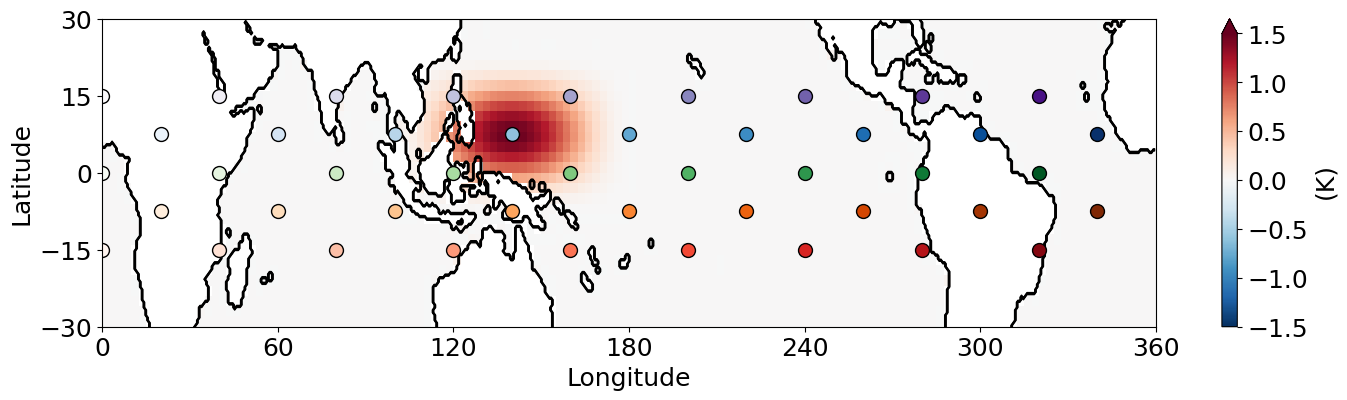

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(17, 4), sharex=True, sharey=True, facecolor='w')
sst.where(land < 0.1).plot(vmax=1.5, cbar_kwargs={'label': '(K)', 'ticks': np.arange(-1.5, 1.5+0.1, 0.5)})
geoaxes(plt.gca())
plt.xlim((0, 360))
plt.ylim((-30, 30))

lat, lon = patch_lat_lon()
color = patch_cmap()

for i in range(len(lat)):
    plt.plot(lon[i], lat[i], 'o', color=color[i], ms=10, markeredgecolor='k')

### combined plot

<>:11: SyntaxWarning: invalid escape sequence '\d'
<>:11: SyntaxWarning: invalid escape sequence '\d'
<>:11: SyntaxWarning: invalid escape sequence '\d'
<>:11: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_832809/995533143.py:11: SyntaxWarning: invalid escape sequence '\d'
  ['$\delta$DGPI/$\Delta T$ (%/K)', '$\delta$SPI/$\Delta T$ (%/K)'],
/tmp/ipykernel_832809/995533143.py:11: SyntaxWarning: invalid escape sequence '\d'
  ['$\delta$DGPI/$\Delta T$ (%/K)', '$\delta$SPI/$\Delta T$ (%/K)'],


Text(0, 1.1, 'C')

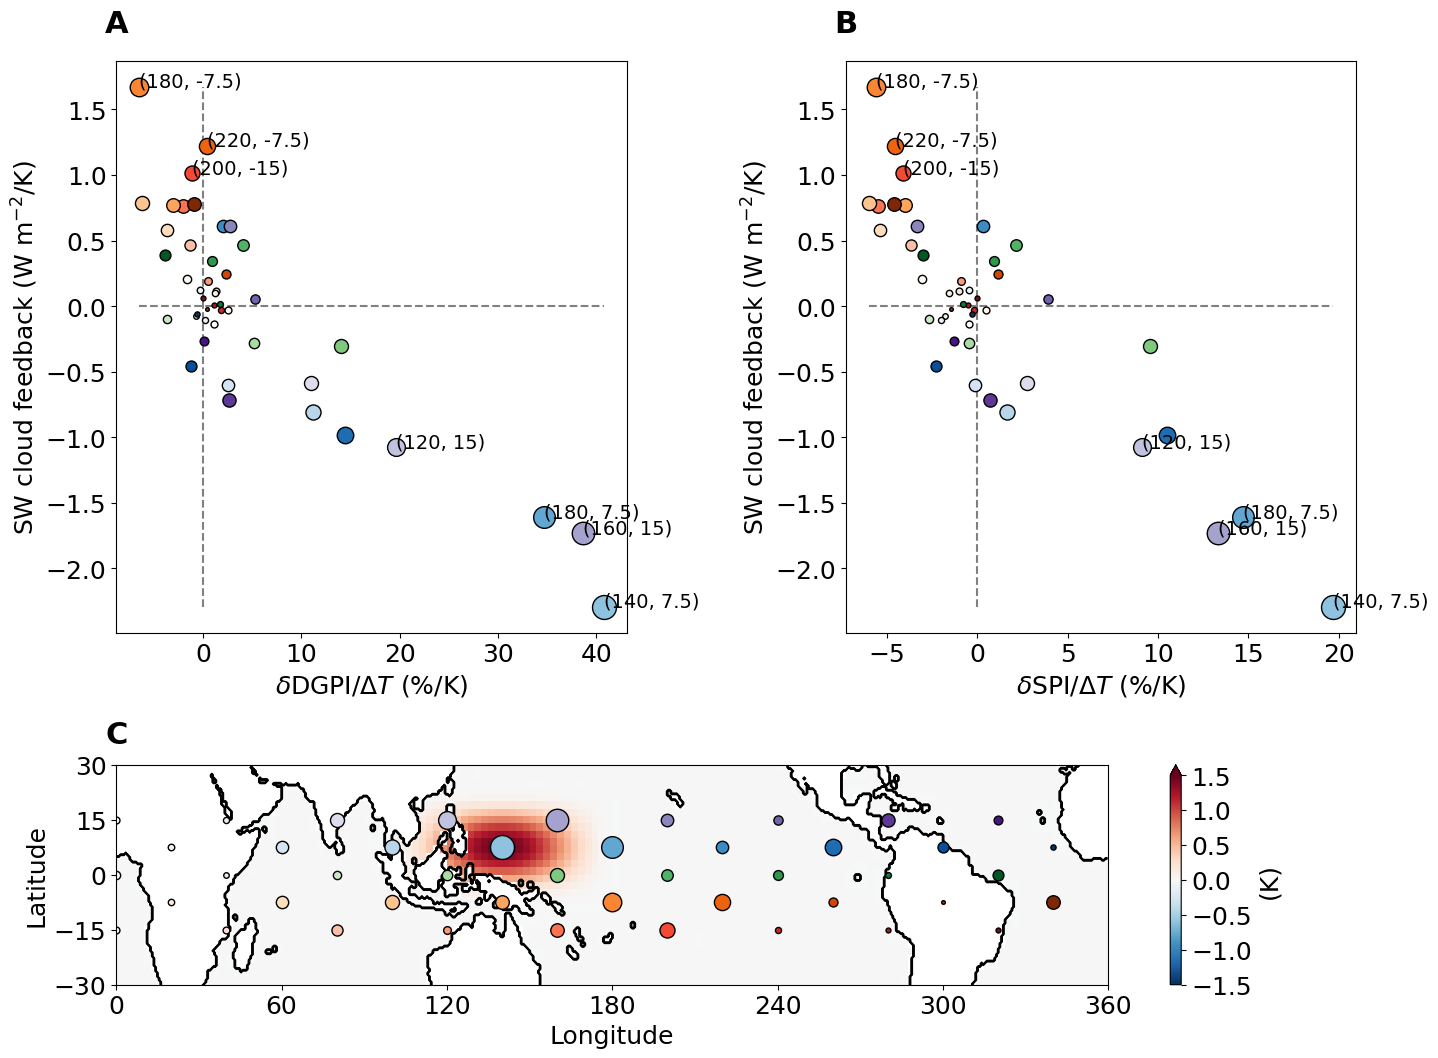

In [8]:
fig = plt.figure(figsize=(16, 12), facecolor='w')
grid = plt.GridSpec(3, 4, hspace=0.6, wspace=1.5)
ax1 = fig.add_subplot(grid[:2, :2])
ax2 = fig.add_subplot(grid[:2, 2:])
ax3 = fig.add_subplot(grid[2, :])

for ax, xx, yy, xlabel, ylabel in \
    zip([ax1, ax2], 
        [ddgpi, dspi], 
        [sw, sw], 
        ['$\delta$DGPI/$\Delta T$ (%/K)', '$\delta$SPI/$\Delta T$ (%/K)'], 
        ['SW cloud feedback (W m$^{-2}$/K)', 'SW cloud feedback (W m$^{-2}$/K)']):
    plt.sca(ax)

    plt.plot([np.min(xx), np.max(xx)], [0, 0], 'gray', ls='--')
    plt.plot([0, 0], [np.min(yy), np.max(yy)], 'gray', ls='--')

    for i in range(len(perts)):
        plt.plot(xx[i], yy[i], 'o', markersize=sizes[i], c=color[i], markeredgecolor='k')
        
        if yy[i] > 1.0 or yy[i] < -1.0:
            plt.gca().annotate(txt2lonlat(perts[i]), (xx[i], yy[i]), fontsize=14)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
plt.sca(ax3)

sst.where(land < 0.1).plot(vmax=1.5, cbar_kwargs={'label': '(K)', 'ticks': np.arange(-1.5, 1.5+0.1, 0.5)})
geoaxes(plt.gca())
plt.xlim((0, 360))
plt.ylim((-30, 30))

lat, lon = patch_lat_lon()
color = patch_cmap()

for i in range(len(lat)):
    plt.plot(lon[i], lat[i], 'o', color=color[i], ms=sizes[i], markeredgecolor='k')

plt.sca(ax1)
plt.text(0, 1.05, 'A', transform=plt.gca().transAxes, weight='bold', fontsize=22, horizontalalignment='center')
plt.sca(ax2)
plt.text(0, 1.05, 'B', transform=plt.gca().transAxes, weight='bold', fontsize=22, horizontalalignment='center')
plt.sca(ax3)
plt.text(0, 1.1, 'C', transform=plt.gca().transAxes, weight='bold', fontsize=22, horizontalalignment='center')

# plt.savefig('Fig4.pdf', bbox_inches='tight')